In [3]:
import illustris_python as il
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# following code from "Stellar_Mass_Profiles.ipynb"

In [75]:
import requests

baseUrl = 'http://www.illustris-project.org/api/'
headers = {"api-key":"e74bff8a3f17fa1497eb8c11243b2b87"}

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()
    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

rename groups_99 to groups_099

In [5]:
basePath = '/home/desi/IllustrisTNG100-3/'
fields = ['SubhaloMass', 'SubhaloMassType', 'SubhaloSFRinRad']
subhalos = il.groupcat.loadSubhalos(basePath,99,fields=fields)

Make a scatterplot of the relations

Text(0, 0.5, 'Star Formation Rate [$M_\\odot / yr$]')

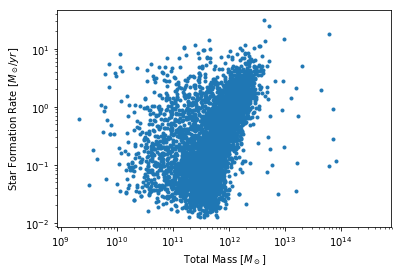

In [6]:
mass_msun = subhalos['SubhaloMass'] * 1e10 / 0.704
plt.plot(mass_msun,subhalos['SubhaloSFRinRad'],'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Mass [$M_\odot$]')
plt.ylabel('Star Formation Rate [$M_\odot / yr$]')

In [7]:
f = h5py.File('/home/desi/IllustrisTNG100-3/groups_099/fof_subhalo_tab_099.0.hdf5', 'r')

In [8]:
list(f)

['Config', 'Group', 'Header', 'IDs', 'Parameters', 'Subhalo']

In [60]:
list(f['Group'])

['GroupBHMass',
 'GroupBHMdot',
 'GroupCM',
 'GroupFirstSub',
 'GroupGasMetalFractions',
 'GroupGasMetallicity',
 'GroupLen',
 'GroupLenType',
 'GroupMass',
 'GroupMassType',
 'GroupNsubs',
 'GroupPos',
 'GroupSFR',
 'GroupStarMetalFractions',
 'GroupStarMetallicity',
 'GroupVel',
 'GroupWindMass',
 'Group_M_Crit200',
 'Group_M_Crit500',
 'Group_M_Mean200',
 'Group_M_TopHat200',
 'Group_R_Crit200',
 'Group_R_Crit500',
 'Group_R_Mean200',
 'Group_R_TopHat200']

In [91]:
list(f['Config'])

[]

In [92]:
list(f['Header'])

[]

Load parameters for snapshot 99 (redshift 0)

In [11]:
GroupFirstSub = f['Group']['GroupFirstSub']
Group_R_Crit200 = f['Group']['Group_R_Crit200']
Group_M_Crit200 = f['Group']['Group_M_Crit200']
Group_M_Mean200 = f['Group']['Group_M_Mean200']
GroupCM = f['Group']['GroupCM']
GroupPos = f['Group']['GroupPos']
GroupMassType = f['Group']['GroupMassType']

NameError: name 'f' is not defined

In [11]:
#list(Group_M_Crit200)

In [10]:
GroupMassType

NameError: name 'GroupMassType' is not defined

In [12]:
#list(Group_M_Mean200)

In [13]:
print(Group_M_Mean200[1])

36437.473


All of the central galaxies indices in snapshot 99

In [14]:
central_galaxies = list(GroupFirstSub)
print(central_galaxies)

[0, 544, 953, 1285, 1662, 1893, 2164, 2383, 2641, 2879, 3043, 3229, 3403, 3605, 3760]


In [15]:
help(il.groupcat.loadSingle)

Help on function loadSingle in module illustris_python.groupcat:

loadSingle(basePath, snapNum, haloID=-1, subhaloID=-1)
    Return complete group catalog information for one halo or subhalo.



In [16]:
ptNumGas = il.snapshot.partTypeNum('gas') # 0
ptNumStars = il.snapshot.partTypeNum('stars') # 4

stellarmass = []
gasmass = []
totalmass = []

for i in range(5):
    all_fields = il.groupcat.loadSingle(basePath,99,subhaloID=GroupFirstSub[i])
    gas_mass   = all_fields['SubhaloMassType'][ptNumGas]
    stars_mass = all_fields['SubhaloMassType'][ptNumStars]
    total_mass = all_fields['SubhaloMass']
    stellarmass.append(stars_mass)
    gasmass.append(gas_mass)
    totalmass.append(total_mass)

In [17]:
print(totalmass)

[29804.924, 29481.428, 24644.398, 15315.601, 16710.242]


In [ ]:
# we want 544 ?????

In [4]:
f2 = h5py.File('/home/desi/IllustrisTNG100-3/groups_099/cutout_99.hdf5', 'r')

In [5]:
f2.keys()

<KeysViewHDF5 ['Header', 'PartType0', 'PartType1', 'PartType4', 'PartType5']>

In [ ]:
f2

In [67]:
list(f2['PartType4'])

['Coordinates',
 'GFM_InitialMass',
 'GFM_Metallicity',
 'GFM_Metals',
 'GFM_StellarFormationTime',
 'GFM_StellarPhotometrics',
 'Masses',
 'NumTracers',
 'ParticleIDs',
 'Potential',
 'SubfindDensity',
 'SubfindHsml',
 'SubfindVelDisp',
 'Velocities']

In [7]:
f2['PartType4/'].keys()

AttributeError: 'Dataset' object has no attribute 'keys'

In [93]:
list(f2['Header'])

[]

In [94]:
list(f2['PartType0'])

['Coordinates',
 'Density',
 'ElectronAbundance',
 'GFM_AGNRadiation',
 'GFM_CoolingRate',
 'GFM_Metallicity',
 'GFM_Metals',
 'GFM_WindDMVelDisp',
 'InternalEnergy',
 'Masses',
 'NeutralHydrogenAbundance',
 'NumTracers',
 'ParticleIDs',
 'Potential',
 'SmoothingLength',
 'StarFormationRate',
 'SubfindDensity',
 'SubfindHsml',
 'SubfindVelDisp',
 'Velocities',
 'Volume']

In [95]:
list(f2['PartType1'])

['Coordinates',
 'ParticleIDs',
 'Potential',
 'SubfindDensity',
 'SubfindHsml',
 'SubfindVelDisp',
 'Velocities']

In [97]:
list(f2['PartType5'])

['BH_CumEgyInjection_QM',
 'BH_CumMassGrowth_QM',
 'BH_Density',
 'BH_Hsml',
 'BH_Mass',
 'BH_Mass_bubbles',
 'BH_Mass_ini',
 'BH_Mdot',
 'BH_Pressure',
 'BH_Progs',
 'BH_U',
 'Coordinates',
 'HostHaloMass',
 'Masses',
 'NumTracers',
 'ParticleIDs',
 'Potential',
 'SubfindDensity',
 'SubfindHsml',
 'SubfindVelDisp',
 'Velocities']

In [68]:
stellar_hsml = list(f2['PartType4']['SubfindHsml'])

In [69]:
stellar_masses = list(f2['PartType4']['Masses'])

In [70]:
#birth_pos = list(f2['PartType4']['BirthPos'])

In [71]:
coordinates = list(f2['PartType4']['Coordinates'])

In [72]:
stellar_hsml = np.array(stellar_hsml)
stellar_masses = np.array(stellar_masses)
print(len(stellar_masses))

8


In [90]:
# Can also access .json file (you need internet connection for this)

subhalo_mass = []
subhalo_position = []
subhalo_sfr = []
subhalo_masstype = []
subhalo_metallicity = []
subhalo_cm = []
subhalo_pos = []
cengals = [0, 544,953, 1285, 1662]

for c in central_galaxies:
    snap_url = "http://www.tng-project.org/api/TNG100-3/snapshots/99/subhalos/"+str(c)+"/info.json"
    #snap_url = "http://www.tng-project.org/api/TNG100-3/snapshots/99/subhalos/"+str(c)+"/cutout.hdf5"
    snap = get(snap_url)
    subhalo_mass.append(snap['SubhaloMass'])
    subhalo_position.append(snap['SubhaloPos'])
    subhalo_sfr.append(snap['SubhaloSFR'])
    subhalo_masstype.append(snap['SubhaloMassType'])
    subhalo_metallicity.append(snap['SubhaloGasMetallicity'])
    subhalo_cm.append(snap['SubhaloCM'])
    subhalo_pos.append(snap['SubhaloPos']) 

In [79]:
central_galaxy = subhalo_pos[0]
radius = []

for c in range(0,len(coordinates)):
    x = coordinates[c][0]-central_galaxy[0]
    y = coordinates[c][1]-central_galaxy[1]
    z = coordinates[c][2]-central_galaxy[2]
    
#     x = birth_pos[c][0]-central_galaxy[0]
#     y = birth_pos[c][1]-central_galaxy[1]
#     z = birth_pos[c][2]-central_galaxy[2]
    
    radius.append(np.sqrt(x**2 + y**2 + z**2))

In [81]:
print(len(radius))
#print(radius)

8


In [82]:
gas_mass = []
stellar_mass = []

print(len(subhalo_masstype))
for m in range(0,len(subhalo_masstype)):
    gas_mass.append(subhalo_masstype[m][0])
    stellar_mass.append(subhalo_masstype[m][1])
    
#print(gas_mass)
print(stellar_mass)

5
[25223.3515625, 25396.427734375, 20868.294921875, 12898.4375, 14111.0078125]


In [87]:
for r in range(len(radius)):
    #ww = np.where(radius<radius[r])
    new_stellar_mass = stellar_masses
    summed_mass = np.sum(new_stellar_mass)
    sum_stellar_mass.append(summed_mass)
    print(ww)

(array([0, 1, 2, 3, 4, 5, 6]),)
(array([0, 1, 2, 3, 4, 5, 6]),)
(array([0, 1, 2, 3, 4, 5, 6]),)
(array([0, 1, 2, 3, 4, 5, 6]),)
(array([0, 1, 2, 3, 4, 5, 6]),)
(array([0, 1, 2, 3, 4, 5, 6]),)
(array([0, 1, 2, 3, 4, 5, 6]),)
(array([0, 1, 2, 3, 4, 5, 6]),)


In [88]:
print(len(sum_stellar_mass))
print(len(radius))

70211
8


ValueError: x and y must have same first dimension, but have shapes (8,) and (70211,)

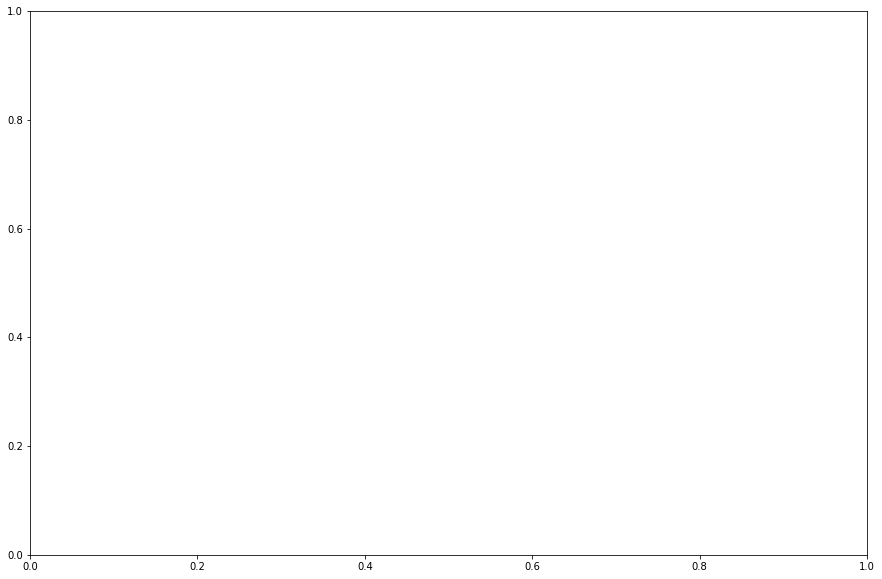

In [89]:
plt.figure(figsize=(15,10))
plt.plot(radius, sum_stellar_mass, 'b.')
plt.title('Stellar Mass vs. Radius',fontsize=16)
plt.xlabel('Radius (ckpc/h)',fontsize=16)
plt.ylabel('Stellar Mass (10^10 Msol/h)',fontsize=16)
plt.grid()

plt.savefig('stellarmass_vs_radius.png')